In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde

In [2]:
filters = ["U", "F378", "F395", "F410", "F430", "G",
           "F515", "R", "F660", "I", "F861", "Z"]

filters_colors = {'U': "#d600a6",
               'F378': "#c300bc",
               'F395': "#a700ce",
               'F410': "#8300de",
               'F430': "#3e00f3",
               'G': "#00c1ff",
               'F515': "#17ff00",
               'R': "#ff5f00",
               'F660': "#f80000",
               'I': "#cb0000",
               'F861': "#a30000",
               'Z': "#9b0000"}

filters_alt = {'U': "u",
               'F378': "J0378",
               'F395': "J0395",
               'F410': "J0410",
               'F430': "J0430",
               'G': "g",
               'F515': "J0515",
               'R': "r",
               'F660': "J0660",
               'I': "i",
               'F861': "J0861",
               'Z': "z"}

In [3]:
gaiascale_data = pd.read_csv("iDR4_gaiascale_zp.csv")
gaiascale_data = gaiascale_data[~np.isnan(gaiascale_data['ZP_gaiascale'])]

gaiascale_data

,Field,ZP_gaiascale
0,STRIPE82-0001,0.011
1,STRIPE82-0002,0.023
2,STRIPE82-0003,0.019
3,STRIPE82-0004,0.010
4,STRIPE82-0005,0.009
...,...,...
1625,SPLUS-d504,-0.072
1626,SPLUS-d510,-0.066
1627,SPLUS-d511,-0.077
1628,SPLUS-d517,-0.066


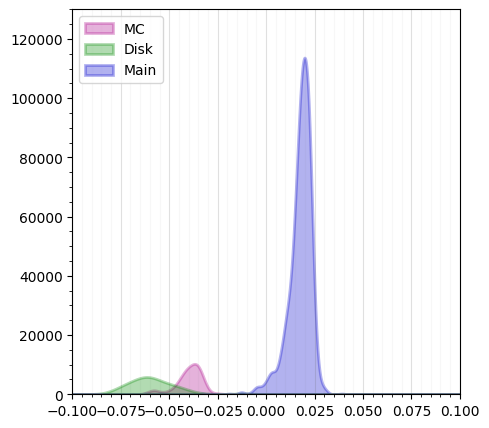

In [4]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))

fMC = gaiascale_data['Field'].str.contains('MC') 
fDisk = gaiascale_data['Field'].str.contains('SPLUS-d') 
fMain = ~(fMC | fDisk)

zp_gaiascale = gaiascale_data['ZP_gaiascale']

kde1 = gaussian_kde(zp_gaiascale[fMC])
x_vals1 = np.linspace(-0.1, 0.1, 1000)
y_vals1 = fMC.sum()*kde1(x_vals1)
ax1.fill_between(x_vals1, y_vals1, color = "#AA0088", label=f'MC', lw = 2, alpha = 0.3, zorder = 1)

kde2 = gaussian_kde(zp_gaiascale[fDisk])
x_vals2 = np.linspace(-0.1, 0.1, 1000)
y_vals2 = fDisk.sum()*kde2(x_vals2)
ax1.fill_between(x_vals2, y_vals2, color = "#008800", label=f'Disk', lw = 2, alpha = 0.3, zorder = 2)

kde3 = gaussian_kde(zp_gaiascale[fMain])
x_vals3 = np.linspace(-0.1, 0.1, 1000)
y_vals3 = fMain.sum()*kde3(x_vals3)
ax1.fill_between(x_vals3, y_vals3, color = "#0000CC", label=f'Main', lw = 2, alpha = 0.3, zorder = 1)

ax1.legend(loc=2)
ax1.set_xlim(-0.1, 0.1)
ax1.set_ylim(0, 130000)
ax1.minorticks_on()
ax1.grid(axis="x", color = "#666666", alpha = 0.2)
ax1.grid(which="minor", axis="x", color = "#666666", alpha = 0.05)


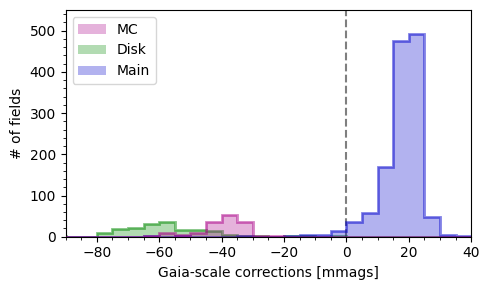

In [10]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 3))

fMC = gaiascale_data['Field'].str.contains('MC') 
fDisk = gaiascale_data['Field'].str.contains('SPLUS-d') 
fMain = ~(fMC | fDisk)

zp_gaiascale = 1000*gaiascale_data['ZP_gaiascale']

ax1.hist(zp_gaiascale[fMC], bins=np.arange(-100, 100 + 1, 5), color = "#AA0088", label=f'MC', lw = 2, alpha = 0.3, zorder = 3)
ax1.hist(zp_gaiascale[fMC], bins=np.arange(-100, 100 + 1, 5), histtype = 'step', color = "#AA0088", lw = 2, alpha = 0.5, zorder = 3)

ax1.hist(zp_gaiascale[fDisk], bins=np.arange(-100, 100 + 1, 5), color = "#008800", label=f'Disk', lw = 2, alpha = 0.3, zorder = 1)
ax1.hist(zp_gaiascale[fDisk], bins=np.arange(-100, 100 + 1, 5), histtype = 'step', color = "#008800", lw = 2, alpha = 0.5, zorder = 1)

ax1.hist(zp_gaiascale[fMain], bins=np.arange(-100, 100 + 1, 5), color = "#0000CC", label=f'Main', lw = 2, alpha = 0.3, zorder = 1)
ax1.hist(zp_gaiascale[fMain], bins=np.arange(-100, 100 + 1, 5), histtype = 'step', color = "#0000CC", lw = 2, alpha = 0.5, zorder = 1)

ax1.plot([0,0],[0,550], color = "#000000", ls = "--", zorder = 0, alpha = 0.5)

ax1.legend(loc=2)
ax1.set_xlim(-90, 40)
ax1.set_ylim(0, 550)
ax1.set_ylabel("# of fields")
ax1.set_xlabel("Gaia-scale corrections [mmags]")

ax1.minorticks_on()
#ax1.grid(color = "#666666", alpha = 0.2)
#ax1.grid(which="minor", axis="x", color = "#666666", alpha = 0.05)

plt.tight_layout()
plt.savefig("gaiascale_correction_v3.png", dpi=300)
plt.show()

In [97]:
print("MC")
print(f"mean: {np.nanmean(zp_gaiascale[fMC]):.1f} mmags")
print(f"sdev: {np.nanstd(zp_gaiascale[fMC]):.1f} mmags")
print("")
print("Disk")
print(f"mean: {np.nanmean(zp_gaiascale[fDisk]):.1f} mmags")
print(f"sdev: {np.nanstd(zp_gaiascale[fDisk]):.1f} mmags")
print("")
print("Main")
print(f"mean: {np.nanmean(zp_gaiascale[fMain]):.1f} mmags")
print(f"sdev: {np.nanstd(zp_gaiascale[fMain]):.1f} mmags")
print("")

MC
mean: -40.0 mmags
sdev: 6.8 mmags

Disk
mean: -59.4 mmags
sdev: 14.4 mmags

Main
mean: 17.3 mmags
sdev: 6.8 mmags

